## <font color = red> *** FILL HERE *** </font>
Patrik Vahala <br>
 <br>
  <br>
22.11.2022 <br>


------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The questions to be answered at this stage could be for example:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

<i>Machine learning</i> is a subfield of artificial intelligence which provides automatic, objective and data-driven techniques for modeling the data. The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this exercise, we are going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format, so that models can learn something from it. Even though we are not doing any major data exploration nor data preparation here this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

<font color = red size = 4><b>The deadline is 28 November at 18:00</b></font>. Late submissions will not be accepted unless there is a valid excuse for extending the deadline before the due date.

------

### Gather **all** packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.

But first, we need data for the task. The code for loading the data into the environment is provided for you. <font color = red>The code should work, but make sure, that you have the csv file of the data in the same directory where you have this notebook file.</font> 

***Exercise 1 A)*** 

Print the first 10 rows to check that everything is ok with the created dataframe.

*note: as said, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable gluc (about glucose levels), which is one-hot-encoded for you. It has the similar values as cholesterol originally does [normal, at risk, elevated]. Also, binary variables have been changed to [0,1] values.*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path, dtype='int')

In [3]:
### Code - 10 first row
firstTen = pd.read_csv(data_path, nrows=10)
print('First ten rows:')
print(firstTen)

First ten rows:
     age  sex  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
0  22767    0     162      75    120     80      0     0       1       0   
1  19102    0     164      80    140     90      0     0       1       0   
2  23251    0     155      76    130     80      0     0       1       0   
3  22651    1     169      65    120     80      0     0       1       0   
4  21770    1     171      67    160    100      0     0       0       1   
5  14651    1     170      70    120     80      0     0       1       0   
6  17391    0     152      65    110     70      0     0       1       0   
7  14792    0     165      65    120     70      0     0       1       0   
8  15982    1     180      81    110     70      1     0       1       0   
9  19589    0     156      60    120     90      0     0       1       0   

   cholesterol_at_risk  cholesterol_elevated  cholesterol_normal  \
0                    0                     0                   1   
1          

----

We have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, we are going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, we'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keep in mind that the test set is not shown for the model before we are actually done with training. 

So, to **find the estimate for the performance of a model**, we are going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because we literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

***Exercise 1 B)*** 

Gather the features as an array `features`, and the target variable as an array `labels`. Produce training and test data.  Divide the data **randomly** into training (80%) and test (20%) sets.

- Would it be a good idea to use stratification? **Explain** your decision.

In [4]:
### Code - Train-test split

features = cardio_data.drop(columns=['cardio'])
#print(features)

labels = cardio_data['cardio']
#print(labels)

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, train_size=0.8, random_state=104, shuffle=True, stratify=None)




In [5]:
features_train #all but cardio data

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
109,22488,0,146,77,140,70,0,0,1,0,0,1,0,0,1
770,18195,0,150,72,120,90,0,0,1,1,0,0,0,0,1
797,23341,0,170,60,100,80,0,0,0,0,0,1,0,0,1
554,16587,0,163,63,120,90,0,0,1,0,0,1,0,0,1
951,21086,1,181,88,140,90,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,23201,1,162,71,120,70,0,0,1,0,0,1,0,0,1
251,20550,0,160,65,110,70,0,0,1,0,0,1,0,0,1
729,18222,0,165,63,90,60,0,0,1,0,0,1,0,0,1
705,18697,0,170,65,120,80,0,0,1,0,0,1,0,0,1


In [6]:
features_test #all but cardio data

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
808,22453,0,160,111,130,80,0,0,0,0,0,1,0,0,1
83,21261,1,175,75,120,80,0,0,1,0,0,1,0,0,1
643,23593,0,167,85,120,80,0,0,0,0,0,1,0,0,1
895,22464,0,169,65,120,80,0,0,1,0,0,1,0,0,1
536,14716,1,170,73,130,90,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,20265,0,162,69,140,90,0,0,1,0,0,1,0,0,1
761,20302,1,182,69,120,80,0,0,1,0,0,1,0,0,1
718,18799,0,161,124,160,90,0,0,1,1,0,0,0,0,1
394,20190,1,170,75,120,80,0,0,1,0,1,0,0,0,1


In [7]:
labels_train #only cardio data

109    0
770    0
797    0
554    1
951    1
      ..
654    1
251    0
729    0
705    0
69     0
Name: cardio, Length: 800, dtype: int32

In [8]:
labels_test #only cardio data

808    0
83     0
643    1
895    1
536    0
      ..
562    1
761    0
718    1
394    0
416    0
Name: cardio, Length: 200, dtype: int32

<font color = red> \*** Answer here (do you need to use strafication? Explain your decision) ***
    
Stratification could be useful here, because it might reduce the bias when randomly selecting samples out of the data. I do not, however, think that it is mandatory since the data is randomly split. 
    
Stratification in general is a technique that should produce samples that represent the whole dataset the best in a smaller more readable way.
    
(ref: https://www.geeksforgeeks.org/stratified-sampling-in-pandas/)</br>
    ------------------------------------------------------------------------------------------------------------------------------------------------</br>
From https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ </br>
    "Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset."

----------

***Exercise 1 C)*** 

Scale the numeric features. 

- Remind yourself briefly why you need this step. 
- What can you say about scaling especially from the perspective of the k-NN algorithm?

*tip: You should now have **two** variables where you have the features divided into. Don't forget to scale the test data. Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html.*

In [9]:
### Code - Standardization
numeric_features = ['age', 'weight','height','ap_hi', 'ap_lo']

stand = StandardScaler() 

#this was just to compare the data. Took it away, since it may make the sheet ugly with too many displays/printouts
#trainScaler = stand.fit(features_train)
#testScaler = stand.fit(features_test)
#display(features_train)
#display(trainScaler.mean_)
#display(testScaler.scale_)

#as the exercise asks to do, I've standardized both train and test data of the features.
train_data_standardized = pd.DataFrame(stand.fit_transform(features_train[numeric_features]), columns=features_train[numeric_features].columns)

display(train_data_standardized)

test_data_standardized = pd.DataFrame(stand.fit_transform(features_test[numeric_features]), columns=features_test[numeric_features].columns)

display(test_data_standardized)

,age,weight,height,ap_hi,ap_lo
0,1.336831,0.275366,-2.342353,1.054367,-1.110335
1,-0.357123,-0.074194,-1.834422,-0.255406,1.065459
2,1.673412,-0.913140,0.705230,-1.565179,-0.022438
3,-0.991616,-0.703403,-0.183649,-0.255406,1.065459
4,0.783623,1.044400,2.102038,1.054367,1.065459
...,...,...,...,...,...
795,1.618170,-0.144106,-0.310631,-0.255406,-1.110335
796,0.572125,-0.563579,-0.564596,-0.910292,-1.110335
797,-0.346469,-0.703403,0.070317,-2.220065,-2.198232
798,-0.159042,-0.563579,0.705230,-0.255406,-0.022438


,age,weight,height,ap_hi,ap_lo
0,1.210617,2.657790,-0.558726,0.313821,-0.133761
1,0.753979,0.118163,1.531272,-0.331237,-0.133761
2,1.647335,0.823615,0.416606,-0.331237,-0.133761
3,1.214831,-0.587289,0.695273,-0.331237,-0.133761
4,-1.753316,-0.022927,0.834606,0.313821,1.004630
...,...,...,...,...,...
195,0.372426,-0.305108,-0.280060,0.958879,1.004630
196,0.386600,-0.305108,2.506604,-0.331237,-0.133761
197,-0.189177,3.574878,-0.419393,2.248996,1.004630
198,0.343695,0.118163,0.834606,-0.331237,-0.133761


<font color = red> \*** Answer here - why standardization? ***

If scaling is not done, it could ruin the performance of the algorithm. Scaling the data usually improves the performance of ML algorithms. 

-------

It's time for us to train the model!

***Exercise 1 D)*** 

Train a k-NN model with $k=3$. Print out the confusion matrix.
- What can you say about the confusion matrix?
- How does the model perform with the different classes? Where do you think the differences come from?
- What is the total classification accuracy? How would you interpret it?
- Perform also the following:
    - Make 1000 **different** train and test set splits.
    - Run the k-NN model (with $k=3$) for each split and save its accuracy.  
    - Plot accuracies in a histogram.
    - Discuss your results


*tip: `sklearn.metrics.classification_report` is a great way to build up a text report showing the main classification metrics*

Accuracy score: 75.5 %


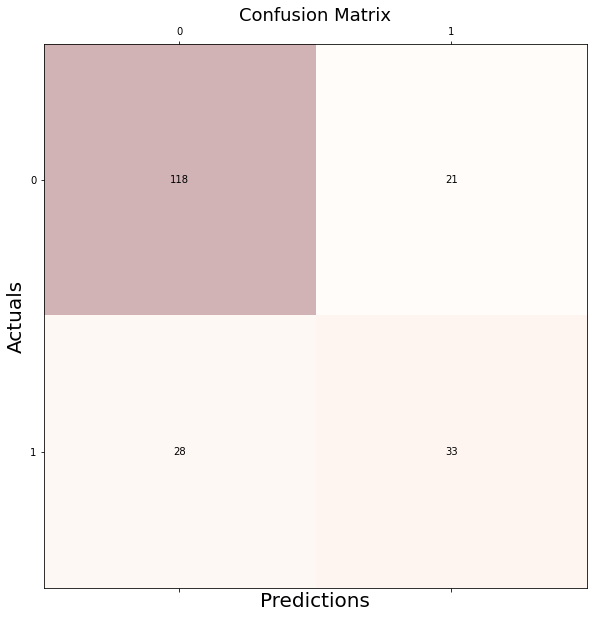

In [10]:
### Code - kNN classifier


#features_train, features_test, labels_train, labels_test
#X_train          X_test         y_train       y_test

knc = KNeighborsClassifier(n_neighbors=3) 
knc.fit(train_data_standardized, labels_train) #800pcs of data. Trained.

label_pred = knc.predict(test_data_standardized)

#Checking accuracy
print("Accuracy score:", metrics.accuracy_score(labels_test, label_pred)*100, "%")

#Well explained tutorial here: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

#making the confusion matrix
conf = metrics.confusion_matrix(y_true = labels_test, y_pred = label_pred) 
#printing the confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(conf, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i,j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [11]:
### Code - 1000 different train-test-splits

#features_train, features_test, labels_train, labels_test
#X_train          X_test         y_train       y_test

accuracy_list = [] #list for saving all of the accuracies

for i in range(1000): #Making 1000 splits. Doing the same as earlier but in a loop.
    features_train_t, features_test_t, labels_train_t, labels_test_t = train_test_split(features, labels, test_size=0.2, train_size=0.8, shuffle=True, stratify=None)
    train_data_standardized_t = pd.DataFrame(stand.fit_transform(features_train_t[numeric_features]), columns=features_train_t[numeric_features].columns)
    test_data_standardized_t = pd.DataFrame(stand.fit_transform(features_test_t[numeric_features]), columns=features_test_t[numeric_features].columns)

    knc.fit(train_data_standardized_t, labels_train_t)
    label_pred_t = knc.predict(test_data_standardized_t)
    accuracy_list.append(metrics.accuracy_score(labels_test_t, label_pred_t)*100)

Text(0.5, 1.0, '1000 splits classification accuracy')

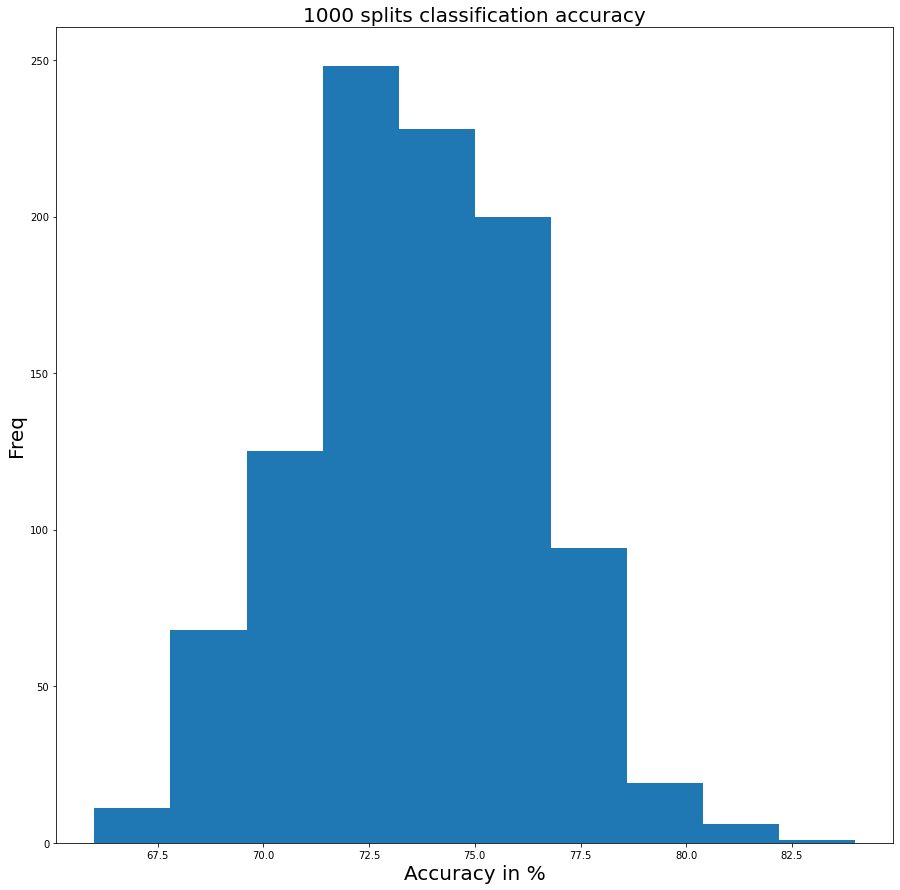

In [12]:
plt.figure(figsize=(15,15))
plt.hist(accuracy_list)
plt.xlabel('Accuracy in %', fontsize=20)
plt.ylabel('Freq', fontsize=20)
plt.title('1000 splits classification accuracy', fontsize=20)

<font color = red> \*** Answer here - Discuss your results. What can you see? What do you think is relevant? \*** 
    
<b>What can you say about the confusion matrix?</b></br>
From guru99.com: The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is composed of squares:</br>
TP: True Positive: Predicted values correctly predicted as actual positive</br>
FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive</br>
FN: False Negative: Positive values predicted as negative</br>
TN: True Negative: Predicted values correctly predicted as an actual negative</br>

TP = 33,
FP = 21,
FN = 28,
TN = 118</br>

So 118 times when predicted negative, the right answer was negative. 33 times when predicted positive, the right answer was positive. 28 times when predicted negative, the right answer was positive. 21 time when predicted positive, the right answer was negative. 
    
<b>How does the model perform with the different classes? Where do you think the differences come from?</b></br>
I do not understand the question unfortunately...

<b>What is the total classification accuracy? How would you interpret it?</b></br>
You can compute the accuracy test from the confusion matrix: <font color = blue> accuracy = (TP+TN)/(TP+TN+FP+FN)</br>

So here it is: accuracy = (33+118)/(33+118+21+28) => 0.755 * 100 = 75.5%

------

One really common evaluation metric is <font color = darkorchid><b>the area under the receiver operating characteristic (AUROC or AUC-ROC)</b></font>.

***Exercise 1 E)*** 

Explain what information you can learn about the one k-NN model you trained by using AUROC. 

Also, evaluate the performance by computing  the metric and plotting the related curve. 

Draw also the line for random guesses.

- How would you interpret the results?

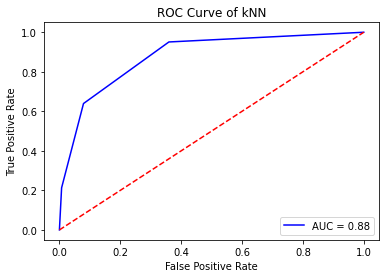

0.8790541337421865


In [13]:
### Code - AUROC and ROC Curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://www.statology.org/auc-in-python/
# https://github.com/gsudhanshu14/K-Nearest-Neighbor-KNN-Algorithm/blob/main/K-Nearest%20Neighbor%28KNN%29%20Algorithm.ipynb


#features_train, features_test, labels_train, labels_test
#X_train          X_test         y_train       y_test


labels_scores=knc.predict_proba(test_data_standardized)
fpr,tpr,threshold = metrics.roc_curve(labels_test, labels_scores[:,1]) #fpr = false positive rate, tpr = true positive rate
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') # Random guesses AUC Score 0.5
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

print(roc_auc)

<font color = red> \*** Answer here - Explain the results ***  </font>

ROC Curve is a plot of the true positive rate vs. false positive rate. Random guesses is in red line where AUC score is 0.5. Blue line is AUC score 0.89833... so the model is quite good!

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation

Even thought the train-test split gives us an unbiased estimate of the performance, we only evaluate the model one time. Especially with very small data sets, a test set will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = darkorchid><b>cross-validation</b></font>. This time, we'll take a look at <font color = darkorchid><i>leave-one-out cross-validation</i></font>.

***Exercise 2 A)***

Describe *in your own words*, how leave-one-out cross validation works? How does it actually differ from the basic train-test split?

<font color = red> \*** Answer here ***
    
From https://www.statology.org/leave-one-out-cross-validation-in-python/ :</br>

LOOCV splits the dataset into training set/testing set BUT leaves only one observation to the testing set while all others are in the training set. Train-test split lets the user choose the amounts that are divided into testing or training (in our case it was 80/20 split). After spliting the data, LOOCV will create a model using only the data of the training set (all but one). This model is then used to predict the observation value of the testing set and then the mean squared error is calculated out of that. This is then repeated as many times as it is told and the test mean squared error is then calculated to be the average of all of the test mean squared errors. 

---------------

***Exercise 2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.

- What is the classification accuracy? Compare the result with the one you got in the previous task.

*tip: Sure this could be done manually, but `cross_val_score` is quite a handy function too.*

In [14]:
### Code - Leave-one-out cross validation
# https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/

looc = LeaveOneOut()

looc.get_n_splits(features)

labels_pred = [] #predicted values
labels_true = [] #actual values of test data

for i, j in looc.split(features):
    features_train_l, features_test_l = features.iloc[i], features.iloc[j]
    labels_train_l, labels_test_l = labels.iloc[i], labels.iloc[j]
    knc.fit(features_train_l, labels_train_l)
    
    labels_pred_one = knc.predict(features_test_l)
    labels_pred.append(labels_pred_one)
    labels_true.append(labels_test_l)
    
looc_accuracy = metrics.accuracy_score(labels_true, labels_pred)

print('Accuracy score:', looc_accuracy*100, "%")

Accuracy score: 70.7 %


<font color = red> \*** Answer here ***
    
Accuracy score here was 70.7% and previously it was 75.5%. So this is a bit less accurate than the last one.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, we're going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3 for you. Note, k-NN has many other hyperparameters too, but for the sake of simplicity, this time we'll focus only on the nearest neighbors. 

Now, you're supposed to find that *optimal value* for k.

***Exercise 3***

Repeat the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.

- Which value of k produces the best classification accuracy?
- If the number of k is still increased, what is the limit that the classification accuracy approaches? Why? 
- Can you say something about the performance of this selected model with new, unseen data? Explain, how you could you estimate the performance of this selected model.

*tip: `GridSearchCV` is a good class for this but will you get the other but the best k value out of it?*

In [15]:
### Code - Select best k

# Using the same tricks as earlier in the 2b and just expanding that a bit :)

hpt_accuracies = [] #save here the accuracies of using the hyperparameter tuning


for k in range(1,31): # k = 1...30 A simple for-loop for testing out the values of k.
    labels_pred_h = [] #predicted values
    labels_true_h = [] #actual values of test data
    for i, j in looc.split(features):
        features_train_h, features_test_h = features.iloc[i], features.iloc[j]
        labels_train_h, labels_test_h = labels.iloc[i], labels.iloc[j]
        knc = KNeighborsClassifier(n_neighbors=k)
        knc.fit(features_train_h, labels_train_h)

        labels_pred_one_h = knc.predict(features_test_h)
        labels_pred_h.append(labels_pred_one_h)
        labels_true_h.append(labels_test_h)
    
    hpt_accuracies.append(metrics.accuracy_score(labels_true_h, labels_pred_h))


In [16]:
print(hpt_accuracies)

[0.692, 0.717, 0.707, 0.73, 0.723, 0.714, 0.712, 0.714, 0.71, 0.711, 0.708, 0.719, 0.708, 0.705, 0.694, 0.696, 0.688, 0.696, 0.699, 0.705, 0.701, 0.699, 0.696, 0.7, 0.688, 0.701, 0.694, 0.689, 0.694, 0.684]


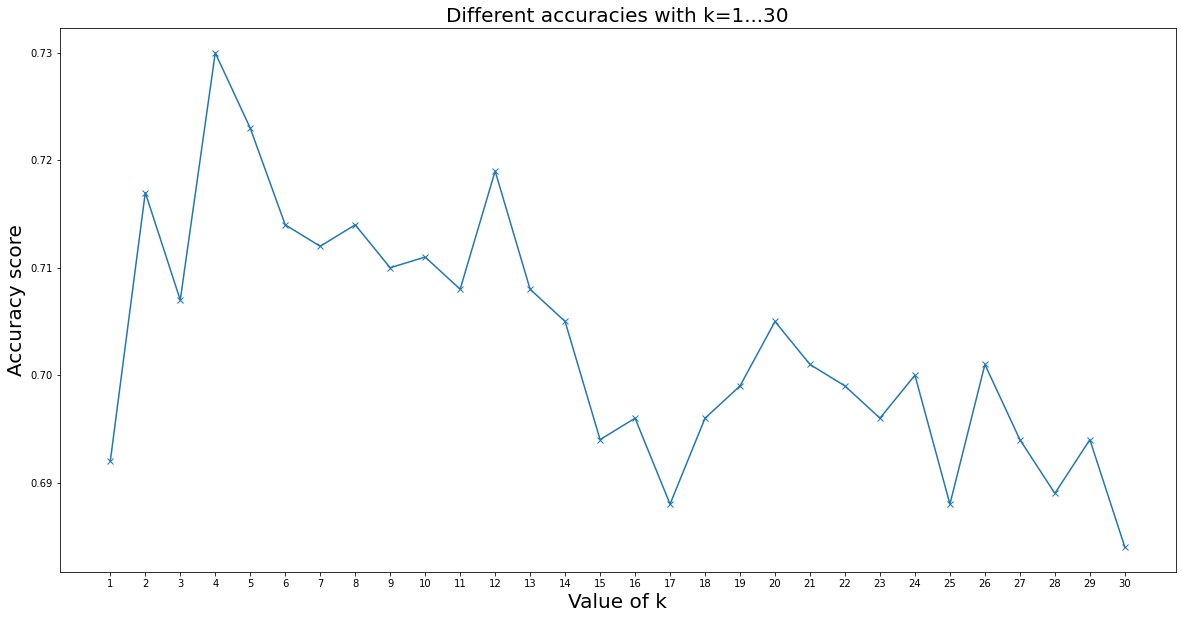

Max accuracy: 73.0 %


In [17]:
kplot = list(range(1,31))
plt.figure(figsize=[20,10])
plt.plot(kplot, hpt_accuracies, marker='x')
plt.xticks(kplot)
plt.xlabel("Value of k", fontsize=20)
plt.ylabel("Accuracy score", fontsize=20)
plt.title("Different accuracies with k=1...30", fontsize=20)
plt.show()

print("Max accuracy:", np.amax(hpt_accuracies)*100, "%")

<font color = red> \*** Answer here ***
    
<b>Which value of k produces the best classification accuracy?</b></br>

From the plot above, we can see that the best accuracy is gained when k=4. With k value of 4 we get the accuracy score of 73%. 

<b>If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?</b></br>

If k is still increased, classification accuracy approaches underfitting. Underfitting means that the model cannot capture the relationship between the input and output variables accurately, and this creates high error rates for training set and unseen data. When k is increased, the model becomes simpler and thus it needs more training time, input features or less regularization. (https://www.ibm.com/cloud/learn/underfitting)

<b>Can you say something about the performance of this selected model with new, unseen data?</b></br>

Accuracy could vary a lot since the best value for k depends on the size of the data.

<b>Explain, how you could you estimate the performance of this selected model.</b></br>

The performance could also vary a lot due to the reasons mentioned before.

________________
## <font color = red>  4. Testing with training data <font color = red> (this should *never* be done out of this exercise!) </font>

Oh, but what if we just used the ***whole data*** in training? Wouldn't we like to use as much data as possible to discover the underlying pattern in the data so why **not** to use the whole data?

*Never ever* do this out of this exercise. Why? Let's take a look.

***Exercise 4***

Repeat the previous task but use the whole data for training. Plot the resulting classification accuracy versus $k = 1...30$. Include the values from the previous task in the *same figure*.

- Comment your result and answer, why you should not test with training data?

In [18]:
### Code - Train with whole data
# Using the same tricks as earlier in the 3 and just expanding that a bit :)

accuracy_all = [] #save here the accuracies of using the hyperparameter tuning and the WHOLE data in training


for k in range(1,31): # k = 1...30 A simple for-loop for testing out the values of k.
    labels_pred_w = [] #predicted values
    labels_true_w = [] #actual values of test data
    for i, j in looc.split(features): #since we're using all of the data, no index for training is used.
        features_train_w, features_test_w = features, features.iloc[j]
        labels_train_w, labels_test_w = labels, labels.iloc[j]
        knc = KNeighborsClassifier(n_neighbors=k)
        knc.fit(features_train_w, labels_train_w)

        labels_pred_one_w = knc.predict(features_test_w)
        labels_pred_w.append(labels_pred_one_w)
        labels_true_w.append(labels_test_w)

    accuracy_all.append(metrics.accuracy_score(labels_pred_w, labels_true_w))

In [19]:
accuracy_all

[1.0,
 0.826,
 0.823,
 0.788,
 0.793,
 0.776,
 0.778,
 0.755,
 0.758,
 0.748,
 0.754,
 0.743,
 0.75,
 0.741,
 0.74,
 0.731,
 0.726,
 0.724,
 0.726,
 0.725,
 0.726,
 0.726,
 0.727,
 0.722,
 0.726,
 0.722,
 0.726,
 0.725,
 0.729,
 0.73]

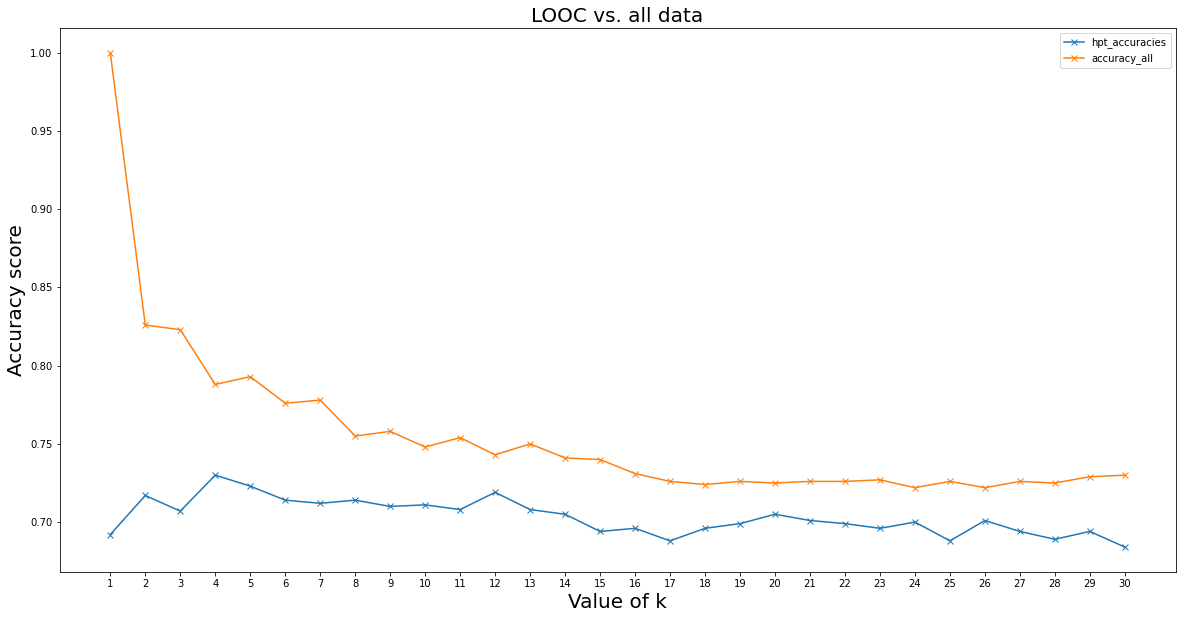

Max accuracy of LOOC: 73.0 %
Max accuracy of using all data: 100.0 %


In [20]:
### Code - Plot results

kplot = list(range(1,31,1))
plt.figure(figsize=[20,10])

allplot = plt.subplot(1,1,1)
allplot.plot(kplot, hpt_accuracies, marker ='x')
allplot.plot(kplot, accuracy_all, marker = 'x')
plt.xticks(kplot)
plt.xlabel("Value of k", fontsize=20)
plt.ylabel("Accuracy score", fontsize=20)
plt.title("LOOC vs. all data", fontsize=20)
plt.legend(['hpt_accuracies', 'accuracy_all'])
plt.show()

print("Max accuracy of LOOC:", np.amax(hpt_accuracies)*100, "%")
print("Max accuracy of using all data:", np.amax(accuracy_all)*100, "%")

 <font color = red> \*** Answer here ***
   
When using the whole data, the accuracy seems to be a lot higher than with the LOOCV. This is actually not true though, since this method gives us no information about who the observations are truly predicted by our model. Classification cannot be done when all of the unseen data is used in the training set.

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and kNN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression. We're going to use <font color = darkorchid><b>Ridge Regression</b></font> and <font color = darkorchid><b>K-Nearest Neighbors Regression</b></font>, and compare the performances of these models.

To make this exercise more intuitively, let's change the data to another somewhat famous dataset called *The Boston Housing Dataset*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Let's have a quick peek at the variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


No worries if the variables don't make a lot of sense. However, the object is to predict **the median house value**. So the target variable is now <font color = darkorchid><b>MEDV</b></font> and all the others are <font color = darkorchid><b>features</b></font>.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [21]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_boston_housing_data.csv'

# Load the data 
boston_data = pd.read_csv(data_path, dtype='float')

-----------

With regression, we can examine **the relationship between two or more variables**. This relationship is represented by an *equation*, which itself represents how much y changes with any given change of x. So for example, we could use *age* as an independent variable to predict *height* (a dependent variable). 

We start by looking at the relationships between the variables in the given dataset.


***Exercise 5 A)***

Make scatter plots where you present each feature versus the target variable `MEDV`.

- What can you say about the relationships?

*tip: seaborn.pairplot is quite a handy function where you can set x_vars and y_vars to point out the variables you need*

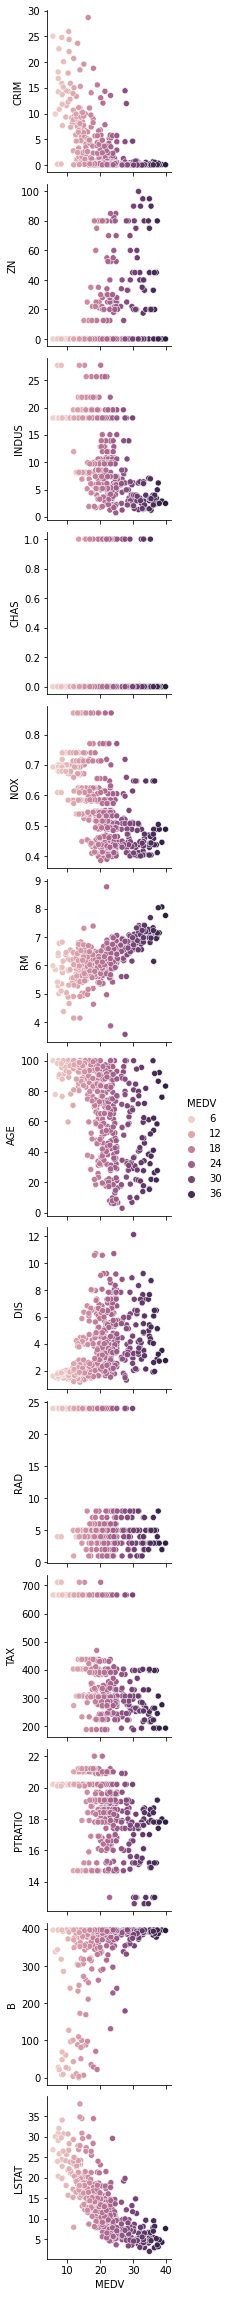

In [22]:
### Code - Scatter plots
# this came out super ugly and hard to read. I didn't find a way to make this any prettier (atleast a way I could bother trying
# to understand).

sns.pairplot(boston_data, x_vars =['MEDV'] , y_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], hue="MEDV")

<font color = red>\*** Answer here - the relationships *** </font> 

<b>What can you say about the relationships</b></br>

Quite frankly, nothing of importance. I can see that the relationship between LSTAT and MEDV is somewhat linear :) Also the relationship between RM and MEDV seems the same but reversed(or upside down, I don't know).

------

We are about to compare two different regression models. We need to be sure that both are *the best models* among the other trained models. But to make sure that these selected models really are the best ones, we're going to use a combination of cross-validation and hyperparameter tuning right away. What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?

For the k-Nearest neighbors, we have previously get familiar with the optimization of the k value. Let's continue with this value to find the *optimal k* for the k-nearest neighbors regression too. With ridge regression, we have this hyperparameter called $\lambda$ (read as 'lambda'). We'll use this parameter for model selection.


To compare the models, let's use a loss function called <font color = darkorchid><b>mean absolute error (MAE)</b></font>. 



***Exercise 5 B)***

Do you need to prepare the data a little? Explain your decision.

In [23]:
### Code - Preparation

#print(boston_data.dtypes)
#display(boston_data)
#from the previous exercises we can copy some old code and repurpose it here:

#splitting into features and labels
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
labels = boston_data['MEDV']


#numeric: only chas is taken away since it's binary. Also MEDV since its the target.
numeric_features =  ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# scaling/standardizing
from sklearn.preprocessing import scale
boston_data[numeric_features] = scale(boston_data[numeric_features])
features_stand = boston_data[features] #standardized features

#checking the data
# display(features, labels, numeric_features)
display(boston_data[numeric_features])
display(features_stand)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.548749,0.320128,-1.303592,-0.137008,0.629691,-0.109981,0.108260,-0.971314,-0.668073,-1.593889,0.439740,-1.175095
1,-0.544712,-0.483035,-0.603934,-0.726934,0.368889,0.378732,0.523617,-0.855688,-0.991540,-0.379700,0.439740,-0.569140
2,-0.544716,-0.483035,-0.603934,-0.726934,1.662736,-0.256239,0.523617,-0.855688,-0.991540,-0.379700,0.394323,-1.313474
3,-0.543739,-0.483035,-1.322701,-0.820980,1.346048,-0.802028,1.042209,-0.740061,-1.111342,0.057407,0.414409,-1.472246
4,-0.536684,-0.483035,-1.322701,-0.820980,1.598382,-0.502379,1.042209,-0.740061,-1.111342,0.057407,0.439740,-1.124113
...,...,...,...,...,...,...,...,...,...,...,...,...
462,-0.537919,-0.483035,0.110423,0.162229,0.660174,0.029141,-0.654829,-0.971314,-0.805846,1.174461,0.384950,-0.491939
463,-0.541258,-0.483035,0.110423,0.162229,-0.140859,0.300252,-0.745325,-0.971314,-0.805846,1.174461,0.439740,-0.577880
464,-0.538279,-0.483035,0.110423,0.162229,1.308791,0.810369,-0.802152,-0.971314,-0.805846,1.174461,0.439740,-1.078958
465,-0.528887,-0.483035,0.110423,0.162229,1.000571,0.749726,-0.697307,-0.971314,-0.805846,1.174461,0.401242,-0.956601


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.548749,0.320128,-1.303592,0.0,-0.137008,0.629691,-0.109981,0.108260,-0.971314,-0.668073,-1.593889,0.439740,-1.175095
1,-0.544712,-0.483035,-0.603934,0.0,-0.726934,0.368889,0.378732,0.523617,-0.855688,-0.991540,-0.379700,0.439740,-0.569140
2,-0.544716,-0.483035,-0.603934,0.0,-0.726934,1.662736,-0.256239,0.523617,-0.855688,-0.991540,-0.379700,0.394323,-1.313474
3,-0.543739,-0.483035,-1.322701,0.0,-0.820980,1.346048,-0.802028,1.042209,-0.740061,-1.111342,0.057407,0.414409,-1.472246
4,-0.536684,-0.483035,-1.322701,0.0,-0.820980,1.598382,-0.502379,1.042209,-0.740061,-1.111342,0.057407,0.439740,-1.124113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,-0.537919,-0.483035,0.110423,0.0,0.162229,0.660174,0.029141,-0.654829,-0.971314,-0.805846,1.174461,0.384950,-0.491939
463,-0.541258,-0.483035,0.110423,0.0,0.162229,-0.140859,0.300252,-0.745325,-0.971314,-0.805846,1.174461,0.439740,-0.577880
464,-0.538279,-0.483035,0.110423,0.0,0.162229,1.308791,0.810369,-0.802152,-0.971314,-0.805846,1.174461,0.439740,-1.078958
465,-0.528887,-0.483035,0.110423,0.0,0.162229,1.000571,0.749726,-0.697307,-0.971314,-0.805846,1.174461,0.401242,-0.956601


<font color = red>\*** Answer here *** </font> 

<b>What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?</b></br>
From https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ :"Typically, it is challenging to know what values to use for the hyperparameters of a given algorithm on a given dataset, therefore it is common to use random or grid search strategies for different hyperparameter values. The more hyperparameters of an algorithm that you need to tune, the slower the tuning process. Therefore, it is desirable to select a minimum subset of model hyperparameters to search or tune. Not all model hyperparameters are equally important. Some hyperparameters have an outsized effect on the behavior, and in turn, the performance of a machine learning algorithm."

<b>Do you need to prepare the data a little?</b></br>

We need to standardize/scale the data to improve the performance of the ML algorithms. We also have to check the type of the data so we know what we're working with. Data is also separated into the features and labels in which labels only has the MEDV and features has everything else. CHAS has been left out of the scaling, since it's binary and not numeric.

------

***Exercise 5 C)***

Then, train a ridge regression model  and a k-NN regression model. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation.

- What are the total performances of each model and how they compare with each other? 
- What does the MAE tell you about the performances of your models and in general?

*note: In a `sklearn.linear_model.Ridge` class, lambda is called alpha so don't get confused*

In [24]:
### Code - Ridge regression and k-NN regression
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

#features_train, features_test, labels_train, labels_test
#X_train          X_test         y_train       y_test
looc = LeaveOneOut()
error_rate = [] #rate of errors. 100% - error_rate*100 = accuracy

for k in range(1,31): # k = 1...30 A simple for-loop for testing out the values of k.
    labels_pred = [] #predicted values
    labels_true = [] #actual values of test data
    for i, j in looc.split(features_stand): #leave one out split
        features_train, features_test = features_stand.iloc[i], features_stand.iloc[j] #features
        labels_train, labels_test = labels.iloc[i], labels.iloc[j] #labels
        kreg = KNeighborsRegressor(n_neighbors=k) 
        kreg.fit(features_train, labels_train) #fitting
        
        labels_pred_one = kreg.predict(features_test)
        labels_pred.append(labels_pred_one)
        labels_true.append(labels_test)
        
    mae = metrics.mean_absolute_error(labels_pred, labels_true) #mean absolute error for KNN regression
    error_rate.append(mae)

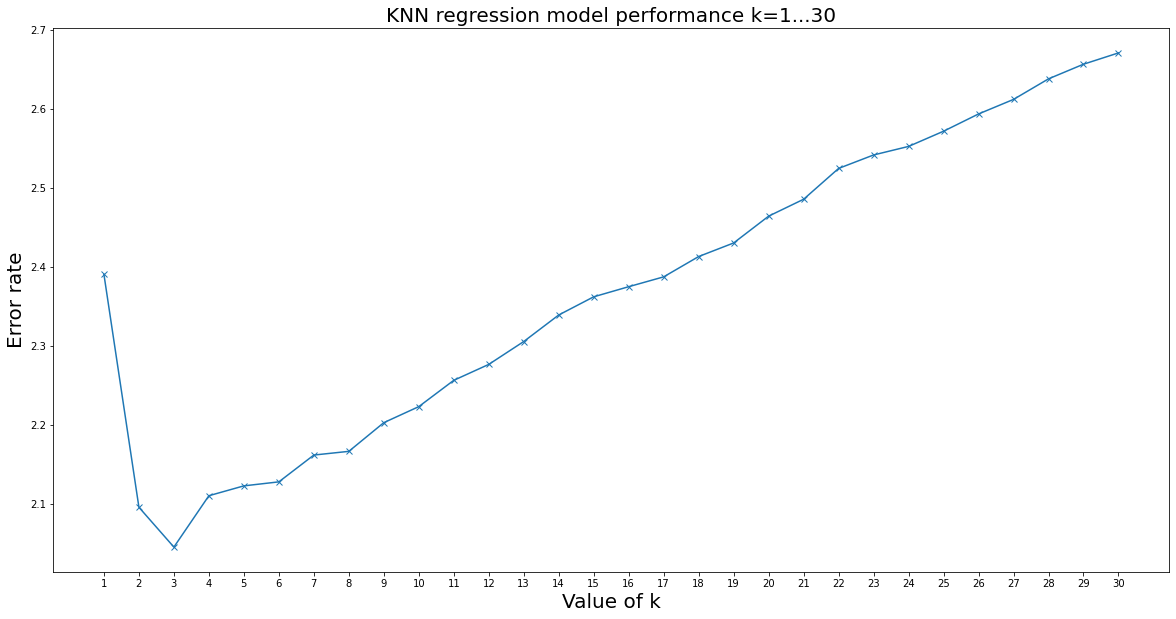

Minimum MAE: 2.045753033547466


In [25]:
#error_rate plot for fun!

kplot = list(range(1,31))
plt.figure(figsize=[20,10])
plt.plot(kplot, error_rate, marker='x')
plt.xticks(kplot)
plt.xlabel("Value of k", fontsize=20)
plt.ylabel("Error rate", fontsize=20)
plt.title("KNN regression model performance k=1...30", fontsize=20)
plt.show()

print("Minimum MAE:", np.amin(error_rate))
best_kreg = min(error_rate)

In [26]:
#coding ridge here so it doesn't run for forever.
#https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
# extra help from Jerry Shadbolt since I couldn't get the "powers" to be iterated through. He used some other method, 
# while I used a for loop for this. Shouldn't be too similar, I hope. 

error_rate_ridge = []

for l in range (-10,11):
    labels_pred_ridge = [] #predicted values
    labels_true_ridge = [] #actual values of test data
    for i, j in looc.split(features_stand): #leave one out split
        features_train_ridge, features_test_ridge = features_stand.iloc[i], features_stand.iloc[j] #features
        labels_train_ridge, labels_test_ridge = labels.iloc[i], labels.iloc[j] #labels
        
        ridge = Ridge(alpha = pow(2,l))
        ridge.fit(features_train_ridge, labels_train_ridge)
        
        labels_pred_ridge_one = ridge.predict(features_test_ridge)
        labels_pred_ridge.append(labels_pred_ridge_one)
        labels_true_ridge.append(labels_test_ridge)
       
        
        
        
    mae = metrics.mean_absolute_error(labels_pred_ridge, labels_true_ridge) #mean absolute error for KNN regression
    error_rate_ridge.append(mae)

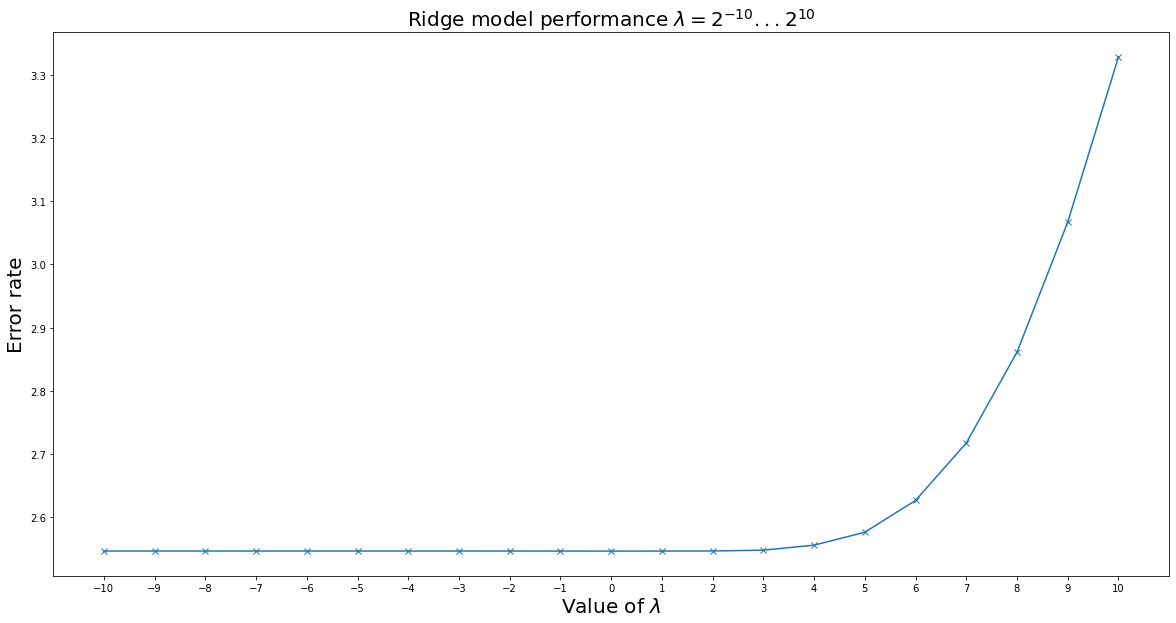

Minimum MAE: 2.546380490906987


In [27]:
#error_rate_ridge plot for fun!

rplot = list(range(-10,11))
plt.figure(figsize=[20,10])
plt.plot(rplot, error_rate_ridge, marker='x')
plt.xticks(rplot)
plt.xlabel("Value of $\lambda$", fontsize=20)
plt.ylabel("Error rate", fontsize=20)
plt.title("Ridge model performance $\lambda=2^{-10}...2^{10}$", fontsize=20)
plt.show()

print("Minimum MAE:", np.amin(error_rate_ridge))
best_ridge = min(error_rate_ridge)

<font color = red>\*** Answer here - discuss your results (comparison and MAE) ***</font></br>

<b>What are the total performances of each model and how they compare with each other?</b></br>

Best MAE is available for k=3 with the k-NN regression. Same for Ridge regression is with $\lambda$ = -10 it seems. Ridge regressions min MAE is only 2.546 where as k-NN regressions MAE gets down to 2.046. 

<b>What does the MAE tell you about the performances of your models and in general?</b></br>

The smaller the MAE, the better the model's performance. MAE is an average of the absolute errors and they're the same as the predicted target. This is used to understand, if the size of the error is actually a concern or not. (from:https://evispot.ai/mae-mean-absolute-error/)

My MAE:s seem to be the same as the minimum error rate, so I'm not fully sure if I've done this correctly.

------

We can say something about the performance now. One way to do the visualization is to plot actual labels vs predicted labels. Let's do that.


***Exercise 5 D)***

Using the best models found in the previous exercise, plot the actual labels vs. predicted labels. 

- How did the selected models perform?
- In an ideal situation, where should the data points be located?

<font size="5">**NEXT TWO PLOTS ARE FOR ALL MODELS WITH THEIR HYPERPARAMETERS RANGED FROM VALUE TO VALUE SINCE I WAS INTERESTED AND THOUGHT IT WOULD BE NICE TO SEE THE DIFFERENCES**</font><font size="0.5">  pls don't give minus points for this :(</font>

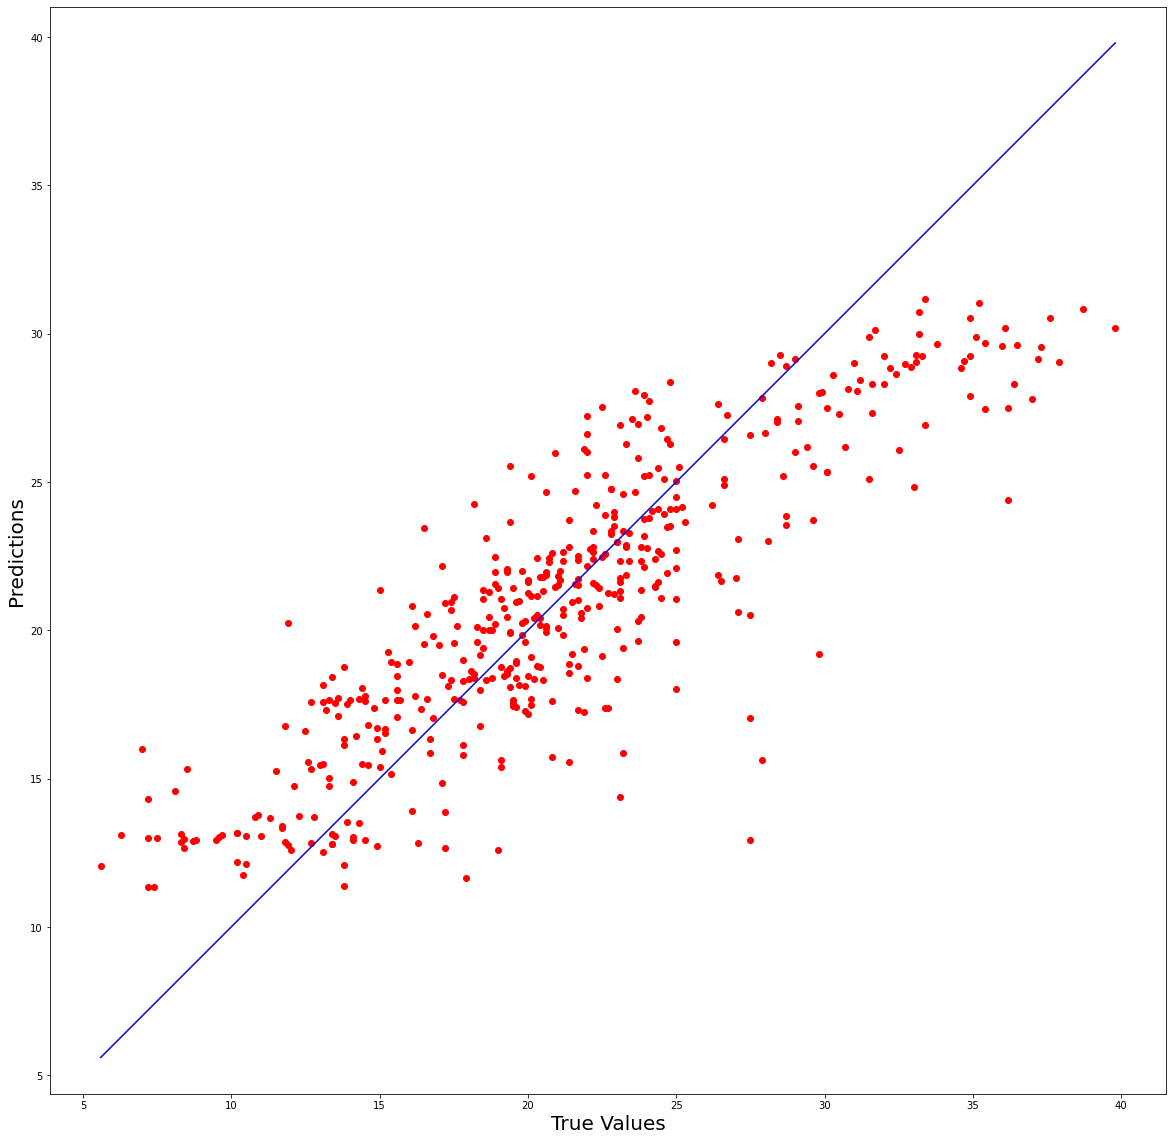

In [28]:
### Code - Plot actual vs predicted labels
# Both plots use this as reference: https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
# reference provided by Veeti Koivuniemi. I couldn't figure out the plotting by my self at 00:51 monday morning...

# ATTENTION!! THIS IS FOR ALL OF THE MODELS WITH VALUES k=1...30 !!! LATER WE'RE GETTING FOR THE BEST MODEL!

#for k-NN regression:

plt.figure(figsize=(20,20))

labels_true = np.array(labels_true)
labels_pred = np.array(labels_pred)

plt.scatter(labels_true, labels_pred, c="red")

p1 = max(max(labels_pred), max(labels_true))
p2 = min(min(labels_pred), min(labels_true))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel("True Values", fontsize=20)
plt.ylabel("Predictions", fontsize=20)

plt.axis('equal')
plt.show()

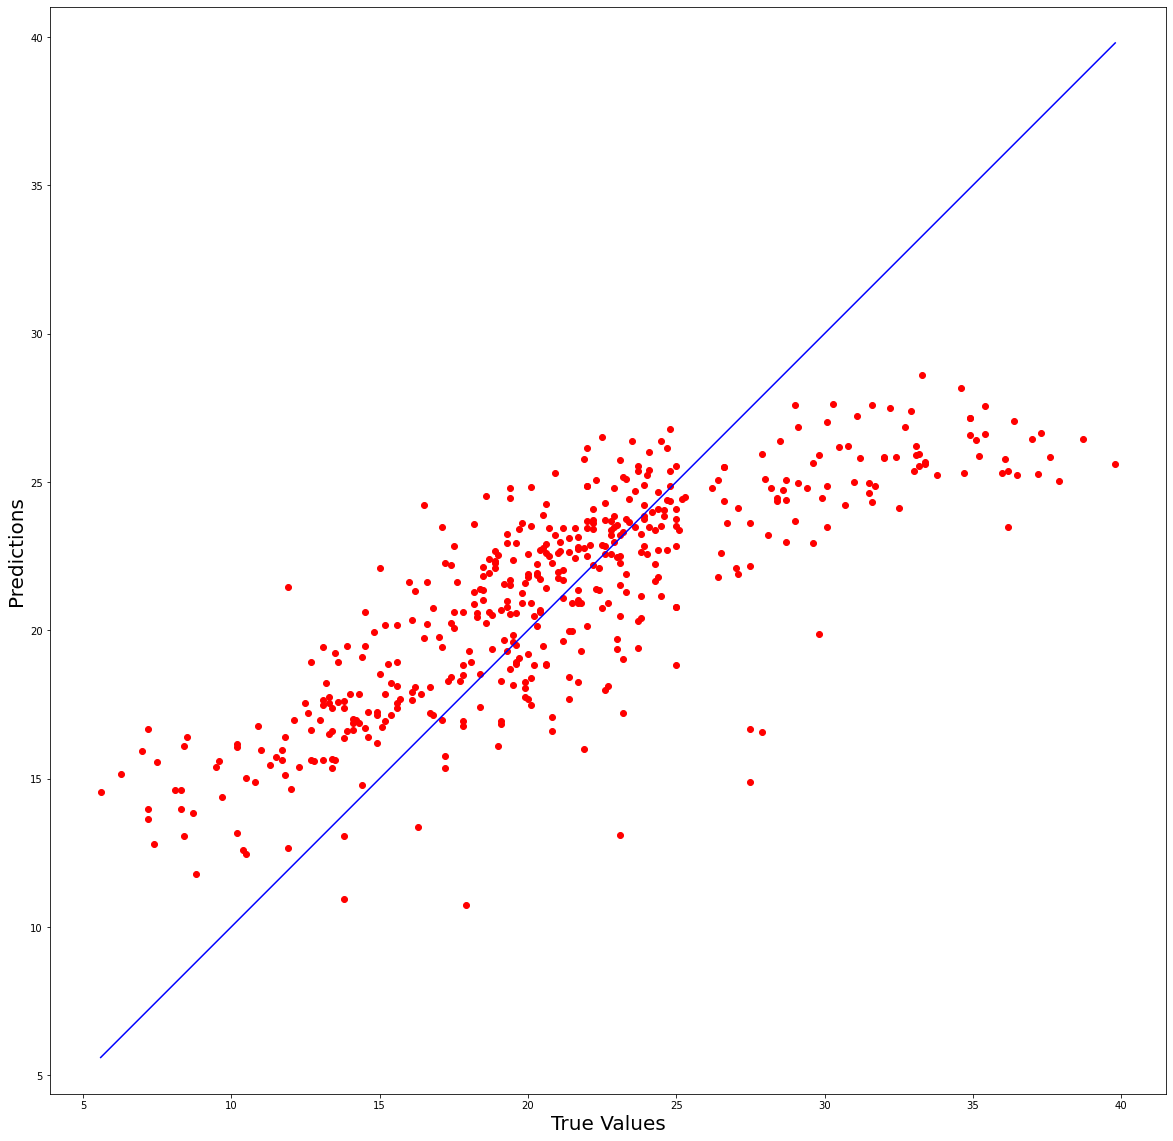

In [29]:

# ATTENTION!! THIS IS FOR ALL OF THE MODELS WITH VALUES lambda=2^-10...2^10 !!! LATER WE'RE GETTING FOR THE BEST MODEL!

#for Ridge regression:
plt.figure(figsize=(20,20))

labels_true_ridge = np.array(labels_true_ridge)
labels_pred_ridge = np.array(labels_pred_ridge)

plt.scatter(labels_true_ridge, labels_pred_ridge, c="red")

p1 = max(max(labels_pred_ridge), max(labels_true_ridge))
p2 = min(min(labels_pred_ridge), min(labels_true_ridge))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel("True Values", fontsize=20)
plt.ylabel("Predictions", fontsize=20)

plt.axis('equal')
plt.show()

<font size="5">**NEXT TWO PLOTS ARE FOR THE BEST MODELS WITH THEIR HYPERPARAMETERS BEING k=3 AND $\lambda$ = -10**</font>

In [30]:
looc = LeaveOneOut()
error_rate = [] #rate of errors. 100% - error_rate*100 = accuracy

#making the LOOC with the best value for k which as seen before is "3"
labels_pred = [] #predicted values
labels_true = [] #actual values of test data
for i, j in looc.split(features_stand): #leave one out split
    features_train, features_test = features_stand.iloc[i], features_stand.iloc[j] #features
    labels_train, labels_test = labels.iloc[i], labels.iloc[j] #labels
    kreg = KNeighborsRegressor(n_neighbors=3)
    kreg.fit(features_train, labels_train) #fitting

    labels_pred_one = kreg.predict(features_test)
    labels_pred.append(labels_pred_one)
    labels_true.append(labels_test)
        
    mae = metrics.mean_absolute_error(labels_pred, labels_true) #mean absolute error for KNN regression
    error_rate.append(mae)

print("Minimum MAE:", np.amin(error_rate))
best_kreg = min(error_rate)

Minimum MAE: 1.616666666666667


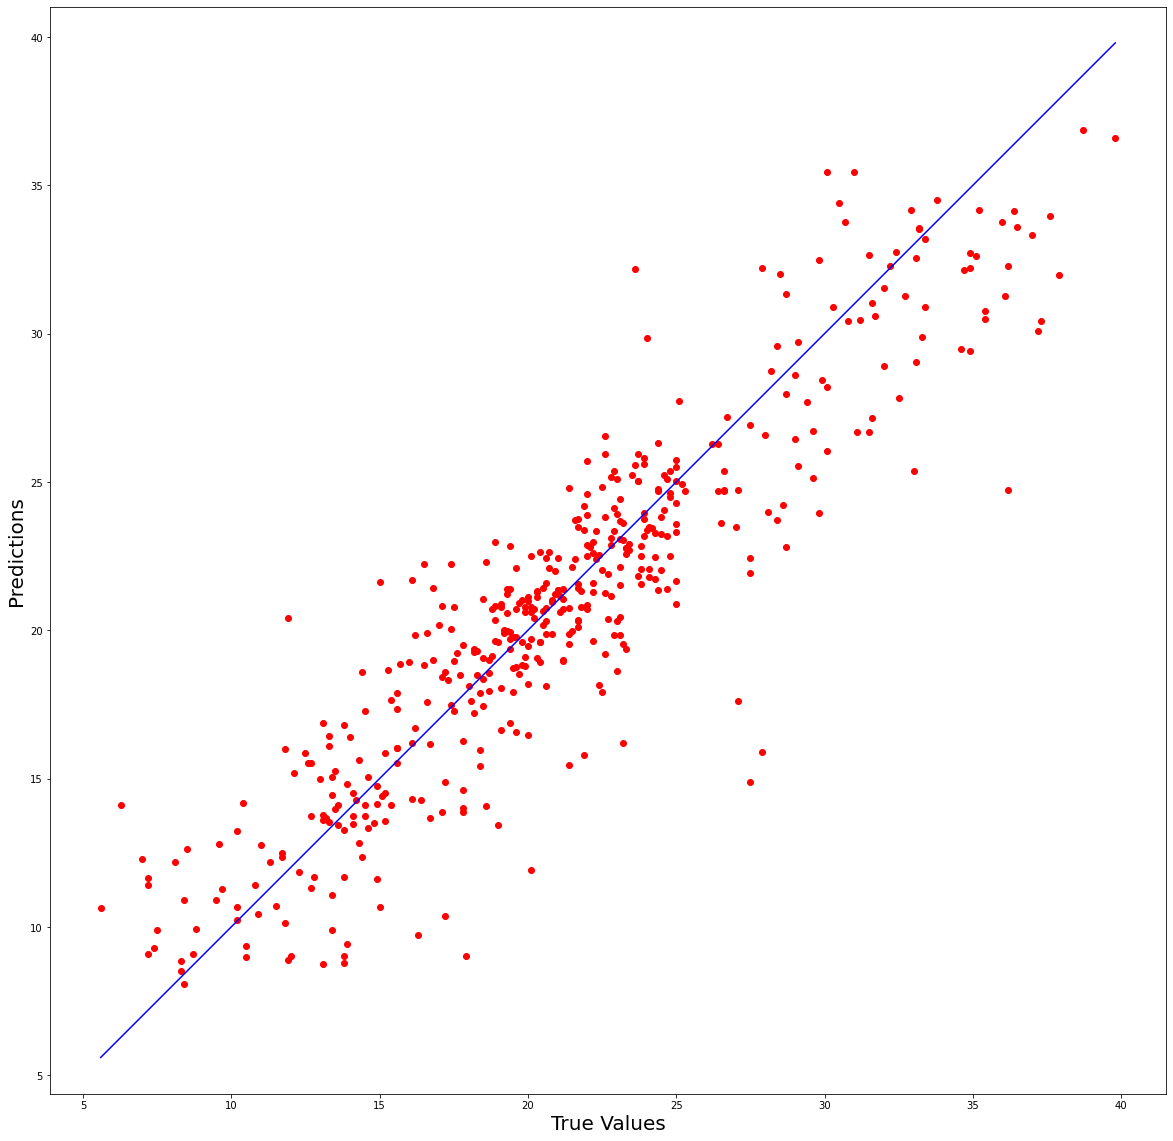

In [31]:
plt.figure(figsize=(20,20))

labels_true = np.array(labels_true)
labels_pred = np.array(labels_pred)

plt.scatter(labels_true, labels_pred, c="red")

p1 = max(max(labels_pred), max(labels_true))
p2 = min(min(labels_pred), min(labels_true))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel("True Values", fontsize=20)
plt.ylabel("Predictions", fontsize=20)

plt.axis('equal')
plt.show()

In [32]:
error_rate_ridge = []

#making the LOOC with the best value for lamda which as seen before is "-10"
labels_pred_ridge = [] #predicted values
labels_true_ridge = [] #actual values of test data
for i, j in looc.split(features_stand): #leave one out split
    features_train_ridge, features_test_ridge = features_stand.iloc[i], features_stand.iloc[j] #features
    labels_train_ridge, labels_test_ridge = labels.iloc[i], labels.iloc[j] #labels

    ridge = Ridge(alpha = pow(2,-10))
    ridge.fit(features_train_ridge, labels_train_ridge)

    labels_pred_ridge_one = ridge.predict(features_test_ridge)
    labels_pred_ridge.append(labels_pred_ridge_one)
    labels_true_ridge.append(labels_test_ridge)




mae = metrics.mean_absolute_error(labels_pred_ridge, labels_true_ridge) #mean absolute error for KNN regression
error_rate_ridge.append(mae)
print("Minimum MAE:", np.amin(error_rate_ridge))
best_ridge = min(error_rate_ridge)

Minimum MAE: 2.5464848257339536


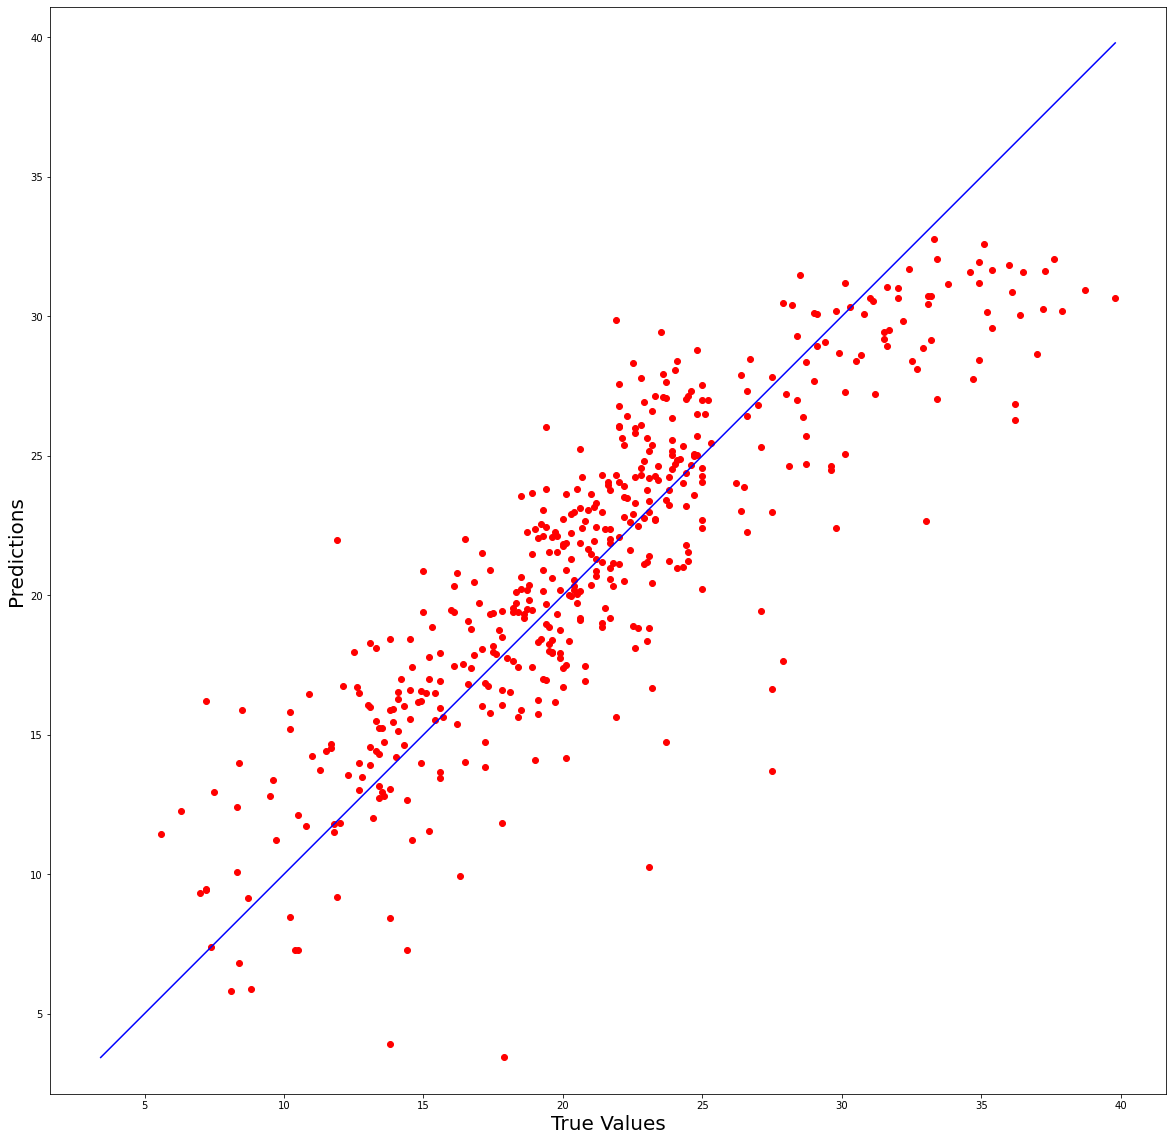

In [33]:
plt.figure(figsize=(20,20))

labels_true_ridge = np.array(labels_true_ridge)
labels_pred_ridge = np.array(labels_pred_ridge)

plt.scatter(labels_true_ridge, labels_pred_ridge, c="red")

p1 = max(max(labels_pred_ridge), max(labels_true_ridge))
p2 = min(min(labels_pred_ridge), min(labels_true_ridge))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel("True Values", fontsize=20)
plt.ylabel("Predictions", fontsize=20)

plt.axis('equal')
plt.show()

<font color = red> \*** Answer here ***</br>

<b>How did the selected models perform?</b></br>

I think the models performed quite similarly. 

<b>In an ideal situation, where should the data points be located?</b></br>
    
In an ideal situation, I think the data points should be located in the line drawn in the middle. 

</br>
</br>
</br>


<b>NOTES</b></br>
I do not understand, why the MAE for k-NN regression is a lot different from the one made before... </br>Before the values were: </br><b>Minimum MAE: 2.045753033547466</b>

But now they are:</br>
<b>Minimum MAE: 1.616666666666667</b></br>

For ridge the values also differ, but not a lot: <b>Minimum MAE: 2.546380490906988</b> vs. <b>Minimum MAE: 2.5464848257339536</b>

If you plan to give a more thorough feedback from these exercises, I'd be interested to know your explanation for this.

________________
## <font color = dimgrey> BONUS: Feature selection - most useful features in predicting the disease </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain me what you did and why you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors are not able to measure all the values represented in the given dataset. Luckily, keen students are ready to help: You should now find <font color = darkorchid><b>five [5] most useful features</b></font> in predicting the presence of the cardiovascular disease among the ones in the given cardio data set. 

Use the selected features to train and test a model of your choice. Evaluate the performance by computing the accuracy and drawing a ROC curve. Remember not to use any information from the test set when selecting the features!

**Discuss** your results.

In [34]:
### Code - BONUS!

<font color = red> \*** Answer here *** </font>